In [16]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Read Dataset 
pd.pandas.set_option('display.max_columns',None)
dataset=pd.read_csv('C:\\Users\\csstf107\\Desktop\\federal-candidates.csv')
print(dataset.shape)
dataset.head()

(46526, 31)


,id,parliament,year,type_elxn,elected,candidate_name,edate,incumbent,gender,birth_year,country_birth,lgbtq2_out,indigenousorigins,occupation,lawyer,censuscategory,riding_id,riding,province,votes,percent_votes,acclaimed,switcher,multiple_candidacy,party_raw,party_minor_group,party_major_group,gov_party_raw,gov_minor_group,gov_major_group,num_candidates
0,26093,1,1867,General,Elected,"POWER,",1867-08-07,Not incumbent,M,1815.0,NaN,NaN,Other,merchant,Other,Sales and service occupations,NaN,HALIFAX,Nova Scotia,2367.0,26.125828,Not acclaimed,Switcher,Single,Anti-Confederate,Third_Party,Third_Party,Conservative,Conservative,Conservative,4
1,13011,1,1867,General,Elected,"JONES,",1867-08-07,Not incumbent,M,1824.0,NaN,NaN,Other,merchant,Other,Sales and service occupations,NaN,HALIFAX,Nova Scotia,2381.0,26.280354,Not acclaimed,Switcher,Single,Labour,Labour,Third_Party,Conservative,Conservative,Conservative,4
2,27974,1,1867,General,Not elected,"SHANNON, S.L.",1867-08-07,Not incumbent,M,NaN,NaN,NaN,Other,lawyer,Lawyer,"Occupations in education, law and social, comm...",NaN,HALIFAX,Nova Scotia,2154.0,23.774834,Not acclaimed,Not switcher,Single,Unknown,Independent,Independent,Conservative,Conservative,Conservative,4
3,18040,1,1867,General,Elected,"KIRKPATRICK, Thomas",1867-08-07,Not incumbent,M,1805.0,NaN,NaN,Other,lawyer,Lawyer,"Occupations in education, law and social, comm...",NaN,FRONTENAC,Ontario,1242.0,64.186043,Not acclaimed,Not switcher,Single,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,2
4,1798,1,1867,General,Elected,"BLANCHET, Hon. J.G.",1867-08-07,Not incumbent,M,1829.0,NaN,NaN,Other,physician,Other,Health occupations,NaN,LÉVIS,Quebec,NaN,100.000000,Acclaimed,Not switcher,Single,Liberal-Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,1


# EDA 

In [18]:
#Finding null values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing values')


incumbent 0.0015 % missing values
birth_year 0.7361 % missing values
country_birth 0.9883 % missing values
lgbtq2_out 0.9541 % missing values
occupation 0.0886 % missing values
lawyer 0.0944 % missing values
censuscategory 0.1203 % missing values
riding_id 0.7627 % missing values
votes 0.0149 % missing values
percent_votes 0.0016 % missing values
acclaimed 0.0008 % missing values


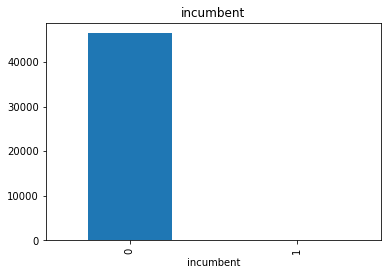

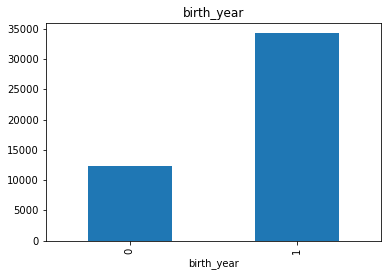

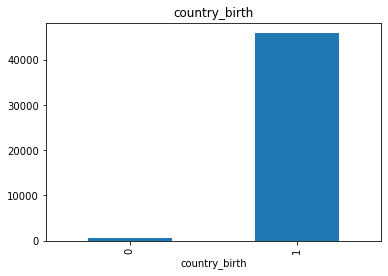

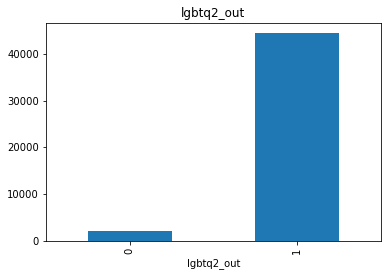

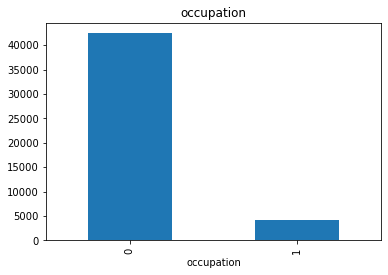

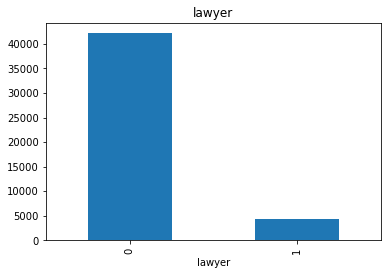

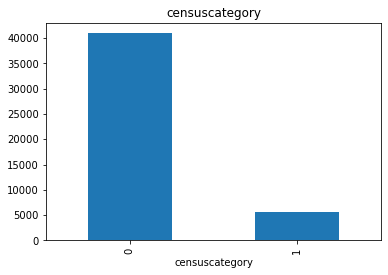

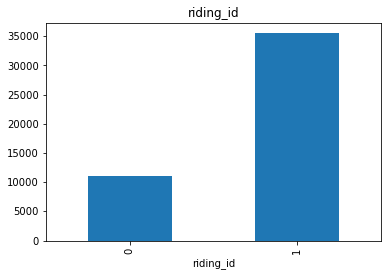

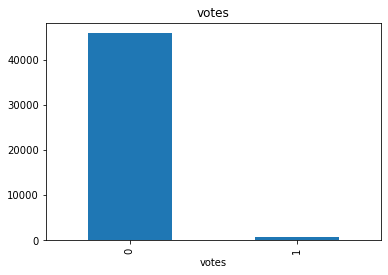

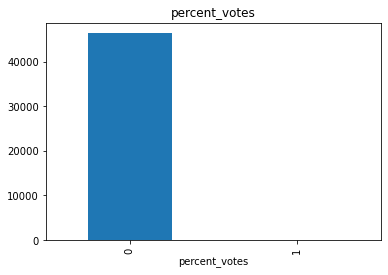

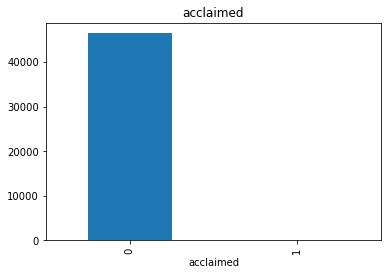

id of voters46526


In [19]:
#we need to find relationship between missing columns with target column
#copy dataset to data  having null values
for feature in features_with_na:
    data=dataset.copy()
#make value of variable 1 if column value is null otherwise 0
    data[feature]=np.where(data[feature].isnull(),1,0)

#calculate mean target column value for missing values
    data.groupby(feature)['elected'].count().plot.bar()
    plt.title(feature)
    plt.show()
#take count of index column
print('id of voters{}'.format(len(dataset.id)))

number of numerical variable 8
year [1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880
 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894
 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 1968 1969 1970 1971 1972 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1986 1987 1988 1989 1990 1993 1995 1996 1997 1998 1999
 2000 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021]


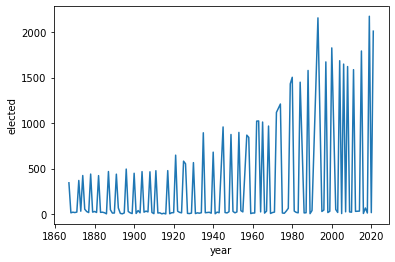

birth_year [1815. 1824.   nan 1805. 1829. 1834. 1813. 1823. 1831. 1821. 1818. 1835.
 1822. 1825. 1811. 1812. 1830. 1820. 1814. 1804. 1819. 1816. 1842. 1817.
 1833. 1827. 1840. 1836. 1832. 1828. 1826. 1802. 1807. 1800. 1808. 1810.
 1809. 1798. 1837. 1806. 1843. 1838. 1841. 1839. 1849. 1850. 1844. 1847.
 1898. 1846. 1845. 1803. 1848. 1852. 1854. 1855. 1856. 1853. 1860. 1858.
 1851. 1857. 1866. 1945. 1865. 1864. 1859. 1862. 1861. 1863. 1871. 1868.
 1869. 1867. 1870. 1872. 1876. 1880. 1873. 1875. 1879. 1882. 1874. 1877.
 1878. 1886. 1881. 1884. 1889. 1887. 1888. 1883. 1890. 1885. 1891. 1894.
 1893. 1897. 1895. 1896. 1892. 1902. 1900. 1901. 1905. 1903. 1899. 1908.
 1904. 1907. 1913. 1912. 1909. 1906. 1911. 1921. 1910. 1916. 1917. 1914.
 1918. 1915. 1923. 1919. 1922. 1924. 1920. 1926. 1925. 1931. 1932. 1928.
 1927. 1929. 1930. 1934. 1937. 1936. 1933. 1935. 1939. 1938. 1946. 1943.
 1944. 1941. 1940. 1947. 1948. 1942. 1952. 1950. 1949. 1954. 1951. 1956.
 1955. 1957. 1960. 1953. 1958. 1962. 196

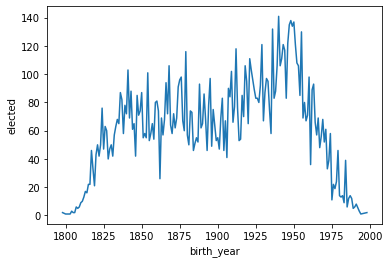

In [21]:
#numerical variables
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
#print numerical column 
print('number of numerical variable',len(numerical_features))
dataset[numerical_features].head()

#find feature that contain year information - temporal variable
year_feature=[feature for feature in numerical_features if 'year' in feature]

#print feature values
for feature in year_feature:
    print(feature,dataset[feature].unique())
    #analyse temporal data with target column
    dataset.groupby(feature)['elected'].count().plot()
    plt.xlabel(feature)
    plt.ylabel('elected')
    plt.show()


descrete variable count 1


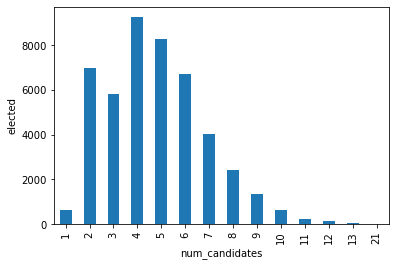

In [23]:
#Numerical variables
descrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['id']]
print('descrete variable count {}'.format(len(descrete_feature)))
dataset[descrete_feature].head()
# find rel b/w descrete feature and target column
for feature in descrete_feature:
    data=dataset.copy()
    data.groupby(feature)['elected'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('elected')
    plt.show()
    # inference- when no of candidates>7 chance of elected going low

In [24]:
#continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature+year_feature+['id']]
print('continuous feature{}'.format(len(continuous_feature)))

continuous feature4


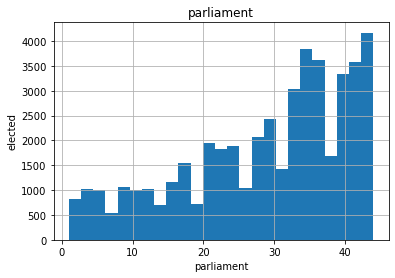

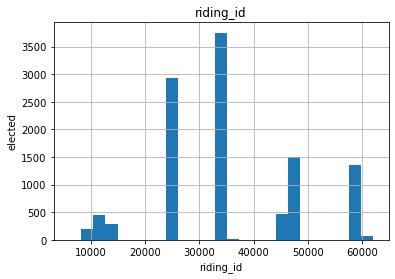

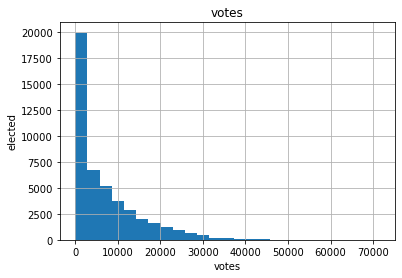

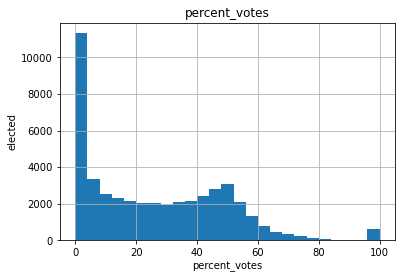

In [25]:
#analyse continuos feature with target column
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('elected')
    plt.title(feature)
    plt.show()

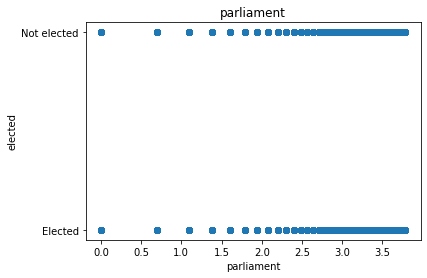

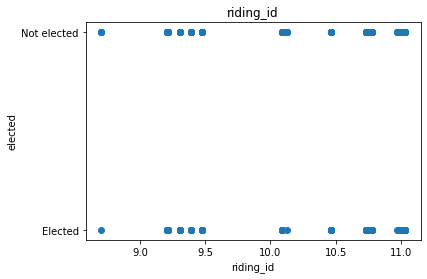

In [26]:
#numerical variable is going to convert into normal distribution using log fn.
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        #data['elected']=data['elected']
        plt.scatter(data[feature],data['elected'])
        plt.xlabel(feature)
        plt.ylabel('elected')
        plt.title(feature)
        plt.show()
        
    

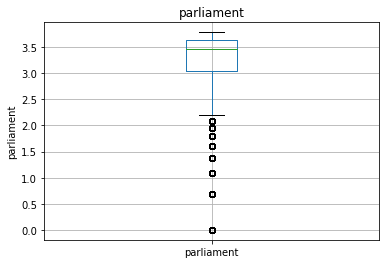

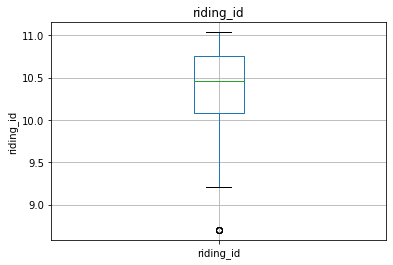

In [27]:
#finding outliers for only continuous features
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
    

In [28]:
#finding categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print('caterical features {}'.format(categorical_features))
dataset[categorical_features].head()

caterical features ['type_elxn', 'elected', 'candidate_name', 'edate', 'incumbent', 'gender', 'country_birth', 'lgbtq2_out', 'indigenousorigins', 'occupation', 'lawyer', 'censuscategory', 'riding', 'province', 'acclaimed', 'switcher', 'multiple_candidacy', 'party_raw', 'party_minor_group', 'party_major_group', 'gov_party_raw', 'gov_minor_group', 'gov_major_group']


,type_elxn,elected,candidate_name,edate,incumbent,gender,country_birth,lgbtq2_out,indigenousorigins,occupation,lawyer,censuscategory,riding,province,acclaimed,switcher,multiple_candidacy,party_raw,party_minor_group,party_major_group,gov_party_raw,gov_minor_group,gov_major_group
0,General,Elected,"POWER,",1867-08-07,Not incumbent,M,NaN,NaN,Other,merchant,Other,Sales and service occupations,HALIFAX,Nova Scotia,Not acclaimed,Switcher,Single,Anti-Confederate,Third_Party,Third_Party,Conservative,Conservative,Conservative
1,General,Elected,"JONES,",1867-08-07,Not incumbent,M,NaN,NaN,Other,merchant,Other,Sales and service occupations,HALIFAX,Nova Scotia,Not acclaimed,Switcher,Single,Labour,Labour,Third_Party,Conservative,Conservative,Conservative
2,General,Not elected,"SHANNON, S.L.",1867-08-07,Not incumbent,M,NaN,NaN,Other,lawyer,Lawyer,"Occupations in education, law and social, comm...",HALIFAX,Nova Scotia,Not acclaimed,Not switcher,Single,Unknown,Independent,Independent,Conservative,Conservative,Conservative
3,General,Elected,"KIRKPATRICK, Thomas",1867-08-07,Not incumbent,M,NaN,NaN,Other,lawyer,Lawyer,"Occupations in education, law and social, comm...",FRONTENAC,Ontario,Not acclaimed,Not switcher,Single,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative
4,General,Elected,"BLANCHET, Hon. J.G.",1867-08-07,Not incumbent,M,NaN,NaN,Other,physician,Other,Health occupations,LÉVIS,Quebec,Acclaimed,Not switcher,Single,Liberal-Conservative,Conservative,Conservative,Conservative,Conservative,Conservative


In [29]:
#printing  category names 
for feature in categorical_features:
    print('feature is  {} and number of categories is {}'.format(feature,len(dataset[feature].unique())))
    

feature is  type_elxn and number of categories is 2
feature is  elected and number of categories is 2
feature is  candidate_name and number of categories is 28067
feature is  edate and number of categories is 705
feature is  incumbent and number of categories is 3
feature is  gender and number of categories is 4
feature is  country_birth and number of categories is 28
feature is  lgbtq2_out and number of categories is 3
feature is  indigenousorigins and number of categories is 2
feature is  occupation and number of categories is 7124
feature is  lawyer and number of categories is 3
feature is  censuscategory and number of categories is 12
feature is  riding and number of categories is 1588
feature is  province and number of categories is 14
feature is  acclaimed and number of categories is 3
feature is  switcher and number of categories is 2
feature is  multiple_candidacy and number of categories is 2
feature is  party_raw and number of categories is 162
feature is  party_minor_group a

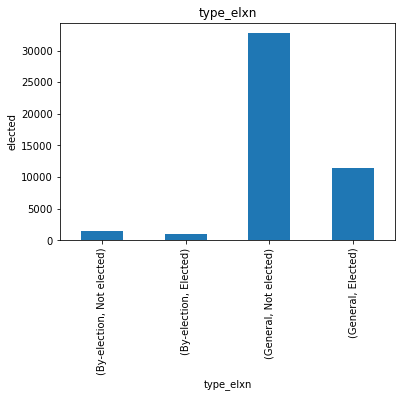

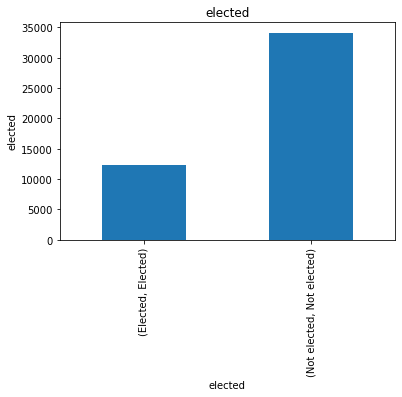

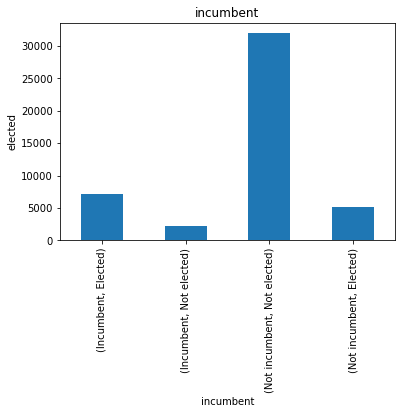

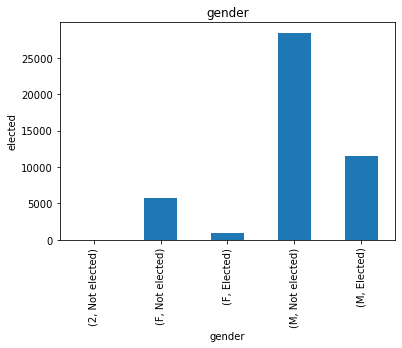

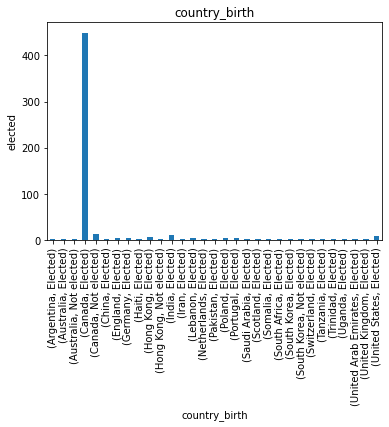

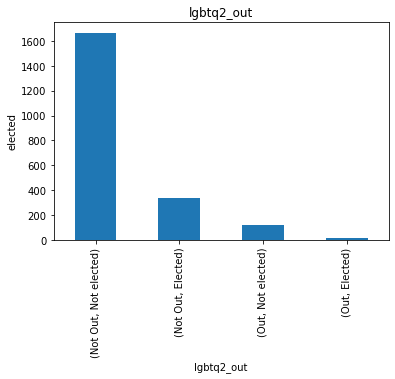

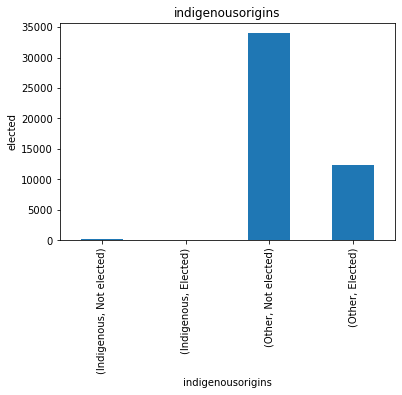

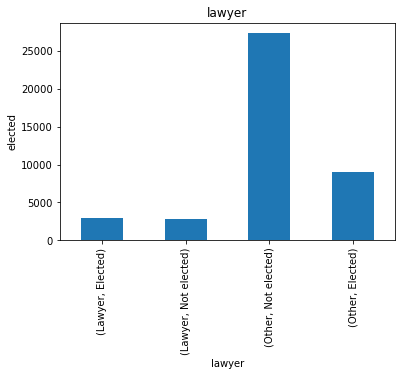

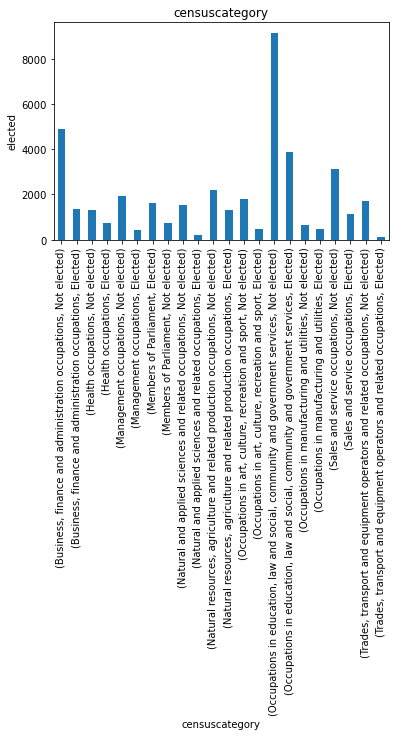

In [ ]:
#not possible to draw graph for candidate_name,occupation,edate as there are numerous values
for feature in categorical_features:
    data=dataset.copy()
    
    if feature!='candidate_name' and feature!='occupation' and feature!='edate':
             
        data.groupby(feature)['elected'].value_counts().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('elected')
        plt.title(feature)
        plt.show()

In [ ]:
dataset.to_csv('C:\\Users\\HP\\Desktop\\federal-candidatesEDA.csv',index=False)
